<a href="https://colab.research.google.com/github/juanibarracantavella/algoritmos/blob/master/Trabajo_Pr%C3%A1ctico_Algoritmos(V2)_Juan_Ibarra_Cantavella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Juan Ibarra Cantavella  <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---/tree/master/TrabajoPractico<br>
Google Colab: https://colab.research.google.com/drive/1ZMBF5IoV59FCdVh2OjdT-QYOulTcu7q1?usp=sharing <br>
Problema:
>2. Organizar los horarios de partidos de La Liga<br>

Descripción del problema:

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

Los horarios disponibles se conocen a priori y son los siguientes:

Viernes 20

Sábado 12,16,18,20

Domingo 12,16,18,20

Lunes 20

En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos):

Categorias / Espectadores(millones)

A-A / 2

A-B / 1.3

A-C / 1

B-B / 0.9

B-C / 0.75

C-C / 0.47

Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla

Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

Dia / hora / coeficiente

V / 20 / 0.4

S / 12 / 0.55

S / 16 / 0.7

S / 18 / 0.8

S / 20 / 1

D / 12 / 0.45

D / 16 / 0.75

D / 18 / 0.85

D / 20 / 1

L / 20 / 0.4

Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:

Coincidencias / Coef. reduccion(%)

0 / 0%

1 / 25%

2 / 45%

3 / 60%

4 / 70%

5 / 75%

6 / 78%

7 / 80%

8 / 80%

El algoritmo debe servir para cualquier jornada, pero se estudiara en este ejercicio solo la jornada siguiente:

Equipos / Categorias

Celta - R.Madrid / B-A

Valencia - R.Sociedad / B-A

Mallorca - Eibar / C-C

Athletic - Barcelona / B-A

Leganes - Osasuna / C-C

Villarreal - Granada / B-C

Alaves - Levante / B-B

Espanyol - Sevilla / B-B

Betis - Valladolid / B-C

Atletico - Getafe / B-B

                                        

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

**El modelo** consistira en los siguientes elementos:
*   Una matriz horarios (10 fil x 2 col) con los 10 horarios representados por un indice de 0 a 9, su string con el dia y la hora, y el coeficiente de horario
*   Una matriz espectadores_base (3 fil x 3 col) con los espectadores para un sabado a las 20 al combinar equipos de distintas categorias.
* Una lista coef_coincidencia (10 elementos) con los coeficiente reductores por coincidencia de partidos. Ademas de los 9 indices proporcionados en el enunciado, para evitar potenciales errores en ejecucion, creo un indice para 10 partidos, aunque esta situacion incumpla la restriccion. Ojo, en mi modelo el numero de coincidencias es el numero de encuentros en un horario concreto.
* Una matriz equipos (20 fil x 2 col) con los 20 equipos, que contine un string con el nombre, y un indice que indica la categoria del equipo (0=A, 1=B, 2=C)
* Una matriz encuentros (10 fil x 2 col) con los 10 partidos para una jornada cualquiera. Le asignaremos el valor de la jornada concreta a estudiar en este ejercicio.

El **espacio de soluciones** es:
* Una lista solucion (10 elementos) que contiene el indice del horario asignado a cada partido segun el orden de la matriz encuentros.

**La funcion objetivo** es el numero total de espectadores que veran una solucion concreta. Se calcula de acuerdo con el enunciado del problema, haciendo la sumatoria de todos los encuentros aplicandoles sus categorias y sus coeficientes de horario y de coincidencia. El objetivo sera maximizar esta funcion.

La unica **restriccion** que tenemos en el espacio de soluciones es que debe haber al menos un encuentro el viernes a las 20h (indice 0 de horarios) y otro el lunes a las 20h(indice 9 de horarios). Lo implementare haciendo que la funcion objetivo devuelva 0 espectadores si en la lista solucion no existen los indices 0 o 9.

In [38]:
#Coeficiente reductor segun horario
horarios = [
    ["V 20h", 0.4],
    ["S 12h", 0.55],
    ["S 16h", 0.7],
    ["S 18h", 0.8],
    ["S 20h", 1],
    ["D 12h", 0.45],
    ["D 16h", 0.75],
    ["D 18h", 0.85],
    ["D 20h", 1],
    ["L 20h", 0.4]
]

#Matriz de espectadores potenciales segun categoria del equipo
espectadores_base = [
    [2, 1.3, 1],
    [1.3, 0.9, 0.75],
    [1, 0.75, 0.47]
]

#Coincidencia se define como numero de encuentros en un horario concreto.
coef_coincidencia = [0, 0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8, 1]

#Matriz de equipos
equipos = [
    ["Celta", 1], # 0
    ["Real Madrid", 0], # 1
    ["Valencia", 1], # 2
    ["R. Sociedad", 0], # 3
    ["Mallorca", 2], # 4
    ["Eibar", 2], # 5
    ["Athletic", 1], # 6
    ["Barcelona", 0], # 7
    ["Leganes", 2], # 8
    ["Osasuna", 2], # 9
    ["Villarreal", 1], # 10
    ["Granada", 2], # 11
    ["Alaves", 1], # 12
    ["Levante", 1], # 13
    ["Espanyol", 1], # 14
    ["Sevilla", 1], # 15
    ["Betis", 1], # 16
    ["Valladolid", 2], # 17
    ["Atletico", 1], # 18
    ["Getafe", 1]  # 19
]

#Matriz de encuentros
encuentros = [
    [0, 1], # 0
    [2, 3], # 1
    [4, 5], # 2
    [6, 7], # 3
    [8, 9], # 4
    [10, 11], # 5
    [12, 13], # 6
    [14, 15], # 7
    [16, 17], # 8
    [18, 19], # 9
]

#Funcion objetivo. Toma un vector solucion y devuelve los espectadores potenciales totales para esa solucion.
def funcion_objetivo(_solucion):
    #Inicializo valor de la funcion objetivo
    valor = 0;
    #Genero una lista de coincidencias que contenga cuantos encuentros hay en cada horario.
    coincidencias = [0] * 10
    for indice_horario in _solucion:
        if indice_horario != -1:
          coincidencias[indice_horario] += 1
    #Compruebo la restriccion del problema
    if coincidencias[0] == 0 or coincidencias [9] == 0:
        return 0
    #Itero la solucion, agregando los espectadores de cada encuentro.
    for indice_encuentro, indice_horario in enumerate(_solucion):
        #Compruebo que el encuentro tiene un horario asignado. A lo largo del ejercicio necesitare evaluar soluciones que aun no tendran todos sus encuentros con horario asignado. Estos casos tendran -1 asignado.
        if indice_horario != -1:
            valor += espectadores_base[equipos[encuentros[indice_encuentro][0]][1]][equipos[encuentros[indice_encuentro][1]][1]] * horarios[indice_horario][1] * (1 - coef_coincidencia[coincidencias[indice_horario]])
    return valor

#Funcion de impresion en formato tabla de una solucion
def imprimir_solucion(_solucion):
  print()
  coincidencias = [0] * 10
  for indice_horario in _solucion:
    if indice_horario != -1:
      coincidencias[indice_horario] += 1
  categorias = ['A','B','C']
  valores = ["Partido", "Categorias", "Horario", "Base(Mill.)","Ponderacion horario", "Base*Ponderacion", "Reduccion coincid.", "Correccion coincidencia"]
  anchos = [25, 15, 15, 15, 22, 22, 20,20]
  fila = " ".join(f"{valores[i]:<{anchos[i]}}" for i in range(len(valores)))
  print(fila)
  print("-"*180)
  for i in range(10):
    valores=[
        equipos[encuentros[i][0]][0]+'-'+equipos[encuentros[i][1]][0],
        categorias[equipos[encuentros[i][0]][1]]+'-'+categorias[equipos[encuentros[i][1]][1]],
        horarios[_solucion[i]][0],
        espectadores_base[equipos[encuentros[i][0]][1]][equipos[encuentros[i][1]][1]],
        horarios[_solucion[i]][1],
        round(espectadores_base[equipos[encuentros[i][0]][1]][equipos[encuentros[i][1]][1]] * horarios[_solucion[i]][1], 2),
        str(coef_coincidencia[coincidencias[solucion[i]]]*100) + '%',
        round(espectadores_base[equipos[encuentros[i][0]][1]][equipos[encuentros[i][1]][1]] * horarios[_solucion[i]][1] * (1 - coef_coincidencia[coincidencias[solucion[i]]]), 2)
    ]
    fila = " ".join(f"{valores[i]:<{anchos[i]}}" for i in range(len(valores)))
    print(fila)
  print()
  print(f"Solucion: {_solucion}")
  print(f"El valor de la funcion objetivo para esta solucion es: {funcion_objetivo(_solucion):.3f} millones de espectadores")
  if coincidencias[0] == 0 or coincidencias [9] == 0:
    print("La solucion NO cumple las restricciones del problema.")
  else:
    print("La solucion SI cumple las restricciones del problema.")



#inicializamos la solucion que se da como ejemplo en el enunciado del ejercicio, de esta manera podremos comprobar que la funcion objetivo devuelve el mismo valor.
solucion = [0,1,2,3,4,6,6,7,8,9]


print("A continuacion la solucion de ejemplo mostrada en el enunciado del problema:")
imprimir_solucion(solucion)

A continuacion la solucion de ejemplo mostrada en el enunciado del problema:

Partido                   Categorias      Horario         Base(Mill.)     Ponderacion horario    Base*Ponderacion       Reduccion coincid.   Correccion coincidencia
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Celta-Real Madrid         B-A             V 20h           1.3             0.4                    0.52                   0%                   0.52                
Valencia-R. Sociedad      B-A             S 12h           1.3             0.55                   0.72                   0%                   0.72                
Mallorca-Eibar            C-C             S 16h           0.47            0.7                    0.33                   0%                   0.33                
Athletic-Barcelona        B-A             S 18h           1.3             0.8             

La funcion objetivo, con la solucion dada en el enunciado, devuelve un valor de 5.88 millones de espectadores, igual que en el enunciado. Esto indica que la construccion de la funcion objetivo es correcta.

#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

El espacio de soluciones es un vector de n elementos, tantos como encuentros, y cada elemento puede tomar m valores, tantos como horarios.

Previo a las restricciones, el numero posible de soluciones es de n^m. En el caso estudiado (n=10, m=10) tenemos 10^10 posibles soluciones.

Al implementar las restricciones, que al menos haya un encuentro el V 20:00 y L 20:00 (indices 0 y 9), las posibles soluciones se reducen de la siguiente manera:

1. Calculamos el numero de combinaciones invalidas:
  - Combinaciones con 0 encuentros el viernes: 9^10
  - Combinaciones con 0 encuentros el lunes: 9^10
  - Combinaciones con 0 encuentros el viernes y el lunes: 8^10
2. Restamos a las combinaciones totales las combinaciones invalidas:
  - 10^10 - 2 * 9^10 - 8^10 = 1.95 * 10^9 soluciones validas

**El espacio de soluciones cuenta por tanto con 1.95 * 10^9 soluciones.**

En el caso generico de n encuentros y m horarios, las posibles soluciones son:
- m^n - 2 * (m-1)^n - (m-2)^n

El **orden de complejidad** del problema para el numero de encuentros n, se trata de una **complejidad exponencial O(m^n)** siendo m el numero de posibles horarios.

Si se quisiera estudiar el orden de complejidad en base al numero de horarios m, se trataria de una complejidad polinomial O(m^n) siendo n el numero de encuentros.



#Diseño
- ¿Que técnica utilizo? ¿Por qué?

Se trata de un problema de asignacion de tareas (encuentros) a una serie de agentes (horarios). Lo abordaremos con 3 algoritmos diferentes: algoritmo por fuerza bruta, algoritmo voraz y algoritmo evolutivo

### 1. Algoritmo por fuerza bruta

Se trata de un algoritmo costoso computacionalmente pero que garantiza la solucion optima al repasar todo el espacio de soluciones. Probablemente, dado el alto numero de combinaciones es muy probable que no sea abordable de esta manera. Realizare un numero limitado de operaciones para estimar el tiempo ejecucion de todo el espacio muestral. A continuacion desarrollo el algoritmo:

In [41]:
import time

# 1. Fuerza bruta
tiempo_inicial = time.time()
#Defino una funcion que me devuelva la siguiente solucion a partir de la actual. La utilizare para iterar todo el espacio de soluciones.
def siguiente_solucion(_solucion):
  indice = 0
  while indice < 10:
    if _solucion[indice] < 9:
      _solucion[indice] += 1
      for i in range(0, indice):
        _solucion[i] = 0
      return _solucion
    else:
      indice += 1
  return [0]*10

#Inicializo la solucion y las variables necesarias
fo_optima = 0
solucion_fbruta = [0] * 10
solucion_iteracion = [0,1,2,3,4,5,6,7,8,9]
n_iteraciones = 100000

#Itero las primeras 10^7 soluciones y guardo el maximo de la funcion objetivo y su solucion.
for k in range(n_iteraciones):
  fo_iteracion = funcion_objetivo(solucion_iteracion)
  if fo_iteracion > fo_optima:
    solucion_fbruta = solucion_iteracion.copy()
    fo_optima = fo_iteracion
  solucion_iteracion = siguiente_solucion(solucion_iteracion)

#Calculo los tiempos de ejecucion
tiempo_final = time.time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_total_estimado = (10**10 * tiempo_ejecucion) / (n_iteraciones * 3600)

#Imprimo el tiempo de ejecucion y la solucion obtenida
print(f"Tiempo de ejecucion: {tiempo_ejecucion:.3f} segundos para {n_iteraciones} iteraciones.")
print(f"Tiempo de ejecucion total estimado: {tiempo_total_estimado:.1f} horas")
print()
print("A continuacion imprimo la solucion encontrada por fuerza bruta (espacio de soluciones incompleto):")
imprimir_solucion(solucion_fbruta)


Tiempo de ejecucion: 0.398 segundos para 100000 iteraciones.
Tiempo de ejecucion total estimado: 11.1 horas

A continuacion imprimo la solucion encontrada por fuerza bruta (espacio de soluciones incompleto):

Partido                   Categorias      Horario         Base(Mill.)     Ponderacion horario    Base*Ponderacion       Reduccion coincid.   Correccion coincidencia
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Celta-Real Madrid         B-A             S 20h           1.3             1                      1.3                    0%                   1.3                 
Valencia-R. Sociedad      B-A             S 18h           1.3             0.8                    1.04                   0%                   1.04                
Mallorca-Eibar            C-C             S 12h           0.47            0.55                   0.26                   0

He realizado 10^7 iteraciones en 48.97 segundos. Por lo que las 10^10 posibles soluciones tardaria 10^10 / 10^7 * 48.97 / 3600= 13.6 horas.

He probado el algoritmo en mi portatil con un notebook de jupyter lab ejecutado en local, y ha tardado 20.9 segundos (estimacion de 5.8 horas para todo el espacio de soluciones.).

He incluido tambien las soluciones invalidas en la estimacion de tiempo ya que son recorridas en la fuerza bruta. Descartarlas en la funcion siguiente_solucion es mas lento.

La fuerza bruta en este ejemplo se trata de un algoritmo viable ya que puede resolverse el problema en un tiempo razonable. Algunas mejoras para profundizar en este algoritmo:
- Poda del arbol de soluciones. Por ejemplo si hay mas de 2 partidos el viernes o el lunes.
- Utilizacion de hardware mas potente.
- Premultiplicacion de los coeficientes reductores para todas las situaciones. Esto ahorraria el tiempo de multiplicacion dentro de funcion_objetivo().
- Division del trabajo de entre varios procesadores que resuelven simultaneamente (divide y venceras). La solucion optima seria la mejor de todas las subtareas.

### 2.Algorimo voraz
Tratare de asignar los encuentros de uno en uno, en orden de espectadores potenciales de mayor a menor. En cada paso, asignare el encuentro en el horario que maximice la funcion objetivo tras ese paso. Para evitar que este algoritmo falle en los primeros pasos debido a las restricciones, debo realizar un primer paso en el que asigne los dos partidos con menor potencial de espectadores a los horarios que mas penalizan: viernes y lunes.

Se trata de un metodo poco costoso computacionalmente, que probablemente obtenga una solucion relativamente buena. La solucion obtenida nos puede servir de referencia para el siguiente algoritmo.


In [36]:
tiempo_inicial = time.time()

#Inicializo la solucion con -1 para todos los elementos
solucion_voraz = [-1] * 10

#Paso 1. Asigno los dos partidos con menor potencial al viernes y al lunes
encuentro_min_1 = -1
espectadores_min_1 = 10
encuentro_min_2 = -1
espectadores_min_2 = 10
for indice_encuentro, valor_encuentro in enumerate(encuentros):
  espectadores = espectadores_base[equipos[valor_encuentro[0]][1]][equipos[valor_encuentro[1]][1]]
  if espectadores < espectadores_min_1:
    encuentro_min_2 = encuentro_min_1
    espectadores_min_2 = espectadores_min_1
    encuentro_min_1 = indice_encuentro
    espectadores_min_1 = espectadores
  elif espectadores < espectadores_min_2:
    encuentro_min_2 = indice_encuentro
    espectadores_min_2 = espectadores
solucion_voraz[encuentro_min_1] = 0
solucion_voraz[encuentro_min_2] = 9

#Paso 2. Asigno el resto de partidos en orden de mayor a menor potencial de espectadores en el horario que maximiza la funcion objetivo en cada paso.
#Itero hasta que todos los elementos de solucion son distintos de -1
while solucion_voraz.count(-1) > 0:
  #Selecciono el encuentro con mayor numero de espectadores potenciales de entre los que todavia no han sido asignados un horario
  encuentro_seleccionado = -1
  espectadores_max = 0
  for indice_encuentro, indice_horario in enumerate(solucion_voraz):
    if indice_horario == -1:
      espectadores = espectadores_base[equipos[encuentros[indice_encuentro][0]][1]][equipos[encuentros[indice_encuentro][1]][1]]
      if (espectadores > espectadores_max):
        espectadores_max = espectadores
        encuentro_seleccionado = indice_encuentro
  #Busco en que horario debe asignarse el encuentro que maximice la funcion objetivo tras este paso.
  func_objetivo_max = -1
  indice_horario_max = -1
  for indice_horario in range(10):
    solucion_voraz[encuentro_seleccionado] = indice_horario
    func_objetivo_iteracion = funcion_objetivo(solucion_voraz)
    if func_objetivo_iteracion > func_objetivo_max:
      func_objetivo_max = func_objetivo_iteracion
      indice_horario_max = indice_horario
  #Finalmente le asigno al encuentro seleccionado el horario que maximiza la funcion objetivo tras este paso
  solucion_voraz[encuentro_seleccionado] = indice_horario_max

tiempo_final = time.time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

#Imprimo el tiempo de ejecucion y la solucion obtenida
print(f"Tiempo de ejecucion: {tiempo_ejecucion:.6f} segundos")
print(f"Solucion propuesta: {solucion_voraz}")
print(f"Funcion objetivo(solucion propuesta): {funcion_objetivo(solucion_voraz):.3f}")
print()
print("A continuacion imprimo la solucion encontrada por algoritmo voraz:")
imprimir_solucion(solucion_voraz)

Tiempo de ejecucion: 0.001485 segundos
Solucion propuesta: [4, 8, 0, 7, 9, 1, 3, 6, 5, 2]
Funcion objetivo(solucion propuesta): 6.856

A continuacion imprimo la solucion encontrada por algoritmo voraz:

Partido                   Categorias      Horario         Base(Mill.)     Ponderacion horario    Base*Ponderacion       Reduccion coincid.   Correccion coincidencia
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Celta-Real Madrid         B-A             S 20h           1.3             1                      1.3                    0%                   1.3                 
Valencia-R. Sociedad      B-A             D 20h           1.3             1                      1.3                    0%                   1.3                 
Mallorca-Eibar            C-C             V 20h           0.47            0.4                    0.19                   0%     

El algoritmo voraz arroja una buena solucion en menos de 2 milesimas de segundo.

### 3. Algoritmo genetico

Para abordarlo con un algoritmo genetico defino el modelo de la siguiente manera:
1. **Representacion de las soluciones** del problema: Voy a asumir que el genotipo y el fenotipo son identivos. Es decir, no hay una funcion que transforme el genotipo en fenotipo. Las soluciones se representaran con el vector solucion empleado hasta ahora. Simplemente contruire una matriz para albergar las soluciones de toda la poblacion en un momento dado.
2. **Funcion de evaluacion(fitness)**: Voy a usar la funcion objetivo usada hasta ahora. Es decir la funcion que estima los espectadores potenciales en base a los horarios elegidos para los partidos.
3. **La poblacion inicial** tendra 100 individuos incializados a 0. Si el problema fuera mas dificil, podria probar a usar mutaciones de la solucion obtenida en el algoritmo voraz para acelerar el proceso evolutivo hacia soluciones buenas.
4. El **operador genetico** utilizado sera solo la mutacion. Esta consistira en dos tipos de mutacion. Una primera que consistira en permutar los elementos del vector de un individuo. Y una segunda mutacion que cambiara un elemento de un vector a un numero al azar.
5. El **mecanismo de seleccion** sera basado en el fitness. Sobreviran el 50% mejor de cada generacion.

Por tanto, cada generacion tendra 100 individuos, se seleccionaran 50, y se repoblaran los 50 huecos con mutantes de los 50 sobrevivientes. La poblacion sera constante en el tiempo por tanto.

Tiempo de ejecucion: 0.913580 segundos


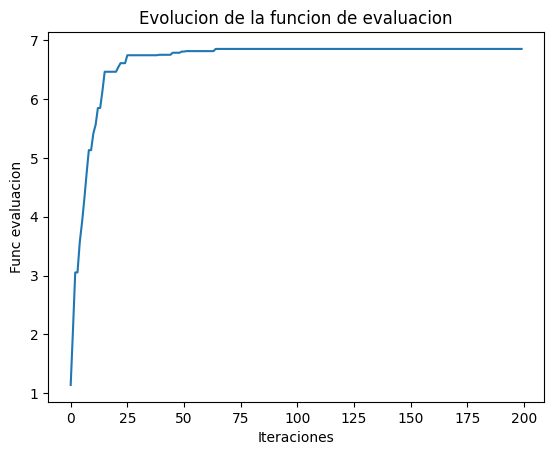


Los 10 mejores individuos tras 200 iteraciones:
0: {'solucion': [4, 7, 9, 8, 0, 5, 6, 3, 1, 2], 'f_eval': 6.856, 'edad': 289}
1: {'solucion': [7, 4, 9, 8, 0, 5, 3, 6, 1, 2], 'f_eval': 6.856, 'edad': 277}
2: {'solucion': [7, 4, 0, 8, 9, 5, 3, 6, 1, 2], 'f_eval': 6.856, 'edad': 261}
3: {'solucion': [7, 4, 9, 8, 0, 5, 3, 6, 1, 2], 'f_eval': 6.856, 'edad': 258}
4: {'solucion': [4, 7, 9, 8, 0, 1, 6, 3, 5, 2], 'f_eval': 6.856, 'edad': 247}
5: {'solucion': [7, 4, 9, 8, 0, 1, 6, 3, 5, 2], 'f_eval': 6.856, 'edad': 245}
6: {'solucion': [4, 7, 9, 8, 0, 5, 2, 3, 1, 6], 'f_eval': 6.856, 'edad': 244}
7: {'solucion': [4, 7, 9, 8, 0, 5, 2, 3, 1, 6], 'f_eval': 6.856, 'edad': 230}
8: {'solucion': [8, 4, 9, 7, 0, 1, 2, 6, 5, 3], 'f_eval': 6.856, 'edad': 228}
9: {'solucion': [7, 4, 9, 8, 0, 5, 6, 3, 1, 2], 'f_eval': 6.856, 'edad': 226}

A continuacion imprimo la mejor solucion encontrada por el algoritmo evolutivo:

Partido                   Categorias      Horario         Base(Mill.)     Ponderacion hor

In [58]:
import random
import matplotlib.pyplot as plt

tiempo_inicial = time.time()

#Funcion de mutacion por permutacion de dos elementos del vector solucion
def mutar_por_permutacion(_solucion_padre):
  solucion_hijo = _solucion_padre.copy()
  i = random.randint(0,9)
  j = random.randint(0,9)
  aux = solucion_hijo[i]
  solucion_hijo[i] = solucion_hijo[j]
  solucion_hijo[j] = aux
  return solucion_hijo

#Funcion de mutacion por sustitucion de un elemento del vector solucion por un numero al azar
def mutar_por_sustitucion(_solucion_padre):
  solucion_hijo = _solucion_padre.copy()
  i = random.randint(0,9)
  j = random.randint(0,9)
  solucion_hijo[i] = j
  return solucion_hijo

#Funcion para asignar el valor de la funcion de evaluacion a todos los individuos
def calcular_funcion_evaluacion():
  for i in range(100):
    poblacion[i]['f_eval'] = funcion_objetivo(poblacion[i]['solucion'])

#Funcion para ordenar los individuos segun su funcion de evaluacion
def ordenar_poblacion():
  poblacion.sort(key=lambda x: x['f_eval'], reverse=True)

#Funcion para sobreescribir los individuos 50-99 por mutantes de los individuos 0-49
def descartar_y_repoblar():
  for i in range(50):
    poblacion[i]['edad'] += 1
    solucion_mutante = poblacion[i]['solucion'].copy()
    solucion_mutante = mutar_por_permutacion(solucion_mutante)
    solucion_mutante = mutar_por_sustitucion(solucion_mutante)
    poblacion[i+50] = individuo_vacio.copy()
    poblacion[i+50]['solucion'] = solucion_mutante.copy()

# Defino la matriz poblacion que albergara:
# -los valores de la solucion de cada individuos de la poblacion
# -el valor de la funcion de evaluacion del individuo
#Inicializo la poblacion con 0s
individuo_vacio = { 'solucion': [0] * 10, 'f_eval': 0, 'edad': 0}
poblacion = [ individuo_vacio ] * 100
calcular_funcion_evaluacion()

#Inicio el proceso evolutivo
n_iteraciones = 200
evolucion_f_eval = [0]*n_iteraciones
for k in range(n_iteraciones):
  descartar_y_repoblar()
  calcular_funcion_evaluacion()
  ordenar_poblacion()
  evolucion_f_eval[k] = poblacion[0]['f_eval']
  #print(f"Iteracion {k}: {poblacion[0]['f_eval']:.3f}")

tiempo_final = time.time()
tiempo_ejecucion = tiempo_final - tiempo_inicial

#Imprimo el tiempo de ejecucion y la solucion obtenida
print(f"Tiempo de ejecucion: {tiempo_ejecucion:.6f} segundos")

#Ploteo la evolucion de la funcion de evaluacion
plt.plot(evolucion_f_eval)
plt.title('Evolucion de la funcion de evaluacion')
plt.xlabel('Iteraciones')
plt.ylabel('Func evaluacion')
plt.show()

#Imprimo la lista de los 10 mejores individuos:
print()
print('Los 10 mejores individuos tras ' + str(n_iteraciones) + ' iteraciones:')
for i in range(10):
  print(str(i) + ': ' + str(poblacion[i]))

#Imprimo en formato tabla el mejor individuo
print()
print("A continuacion imprimo la mejor solucion encontrada por el algoritmo evolutivo:")
imprimir_solucion(poblacion[0]['solucion'])

Se puede observar que tras unas 100 iteraciones se alcanza un valor estable de la funcion de evaluacion. El criterio de parada lo he establecido en 200 iteraciones porque es suficiente para llegar al maximo. No obstante podria fijarse un criterio de parada en el que si la funcion objetivo no mejora en X segundos o X iteraciones se de por concluida la evolucion.

Este algoritmo es poco costoso y ha tardado menos de 1 segundo. Al ser heuristico no tenemos la certeza de que sea el optimo pero por otro lado nos otorga multiples soluciones igual de buenas.

Otra gran ventaja de los algoritmos evolutivos/geneticos es que no es necesario entender el problema, sin embargo es beneficioso entenderlo para poder elegir los modelos de representacion (genotipo/fenotipo), los criterios de evaluacion y los operadores geneticos. En este ejemplo concreto, he elegido unos operadores geneticos que trataran de conservar las bondades del individuo padre.

### Conclusiones

Mis principales conclusiones derivadas del ejercicio son las siguietes:
- El algoritmo de fuerza bruta es interesante plantearlo siempre y hacer una estimacion de su tiempo total. A priori es muy dificil saber si es posible abordarlo por esta via o no. Una vez estimado el tiempo de resolucion se puede decidir si merece la pena el esfuerzo para obtener la solucion optima.
- El algoritmo voraz es una solucion muy poco costosa (muy rapida). Se basa en el algoritmo que aplicaria un humano pero aplicando la velocidad de los procesadores. Requiere una buena estrategia y esto no siempre es posible.
- El algoritmo evolutivo me ha sorprendido. Pensaba que tendria que realizar muchas pruebas con genotipos/fenotipos, distintos operadores geneticos y muchas iteraciones. Sin embargo, con dos simples operadores de geneticos, sin diferenciacion genotivo/fenotipo y con tan solo 200 iteraciones (1 segundo), he conseguido llegar a una solucion buena. Sin duda esto se debe a que es un problema relativamente sencillo.